In [ ]:
import importlib
import modules
from collections import Counter
import numpy as np

importlib.reload(modules)

from modules import CA
import matplotlib.pyplot as plt

from modules import run_model_stochastic
import random

importlib.reload(modules)

In [ ]:
density_list = np.linspace(0.3, 0.9, 100)
L = 100
T = 50
n_repetitions = 100
v_max = 5
trials = 5
shannon_entropy = {}

import itertools

for p in density_list:
    print(p)
    for n in range(trials):
        lifespan_counter, jam_counter, all_evolutions = run_model_stochastic(p, L, T, n_repetitions, v_max, return_evolutions=True)
        merged = list(itertools.chain.from_iterable(list(itertools.chain.from_iterable(all_evolutions))))
        second_items = [tuple_item[1] for tuple_item in merged]
        speeds = Counter(second_items)
        
        probabilities = [count / len(second_items) for count in speeds.values()]

        # shannon_entropy[p] += -sum(p * np.log2(p) for p in probabilities)

        if p not in shannon_entropy:
                    shannon_entropy[p] = [-sum(p * np.log2(p) for p in probabilities)]
        else:
            shannon_entropy[p] += [-sum(p * np.log2(p) for p in probabilities)]


Index(['p_slowdown', 'v_max', 'critical_density'], dtype='object')


/var/folders/f8/8_w9799j2wlfkyxvlcmd3z180000gn/T/ipykernel_37649/1023894569.py:17: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  surf = ax.scatter(x_values, y_values, z_values, cmap='viridis', edgecolor='k', linewidth=0.5, alpha=0.8)


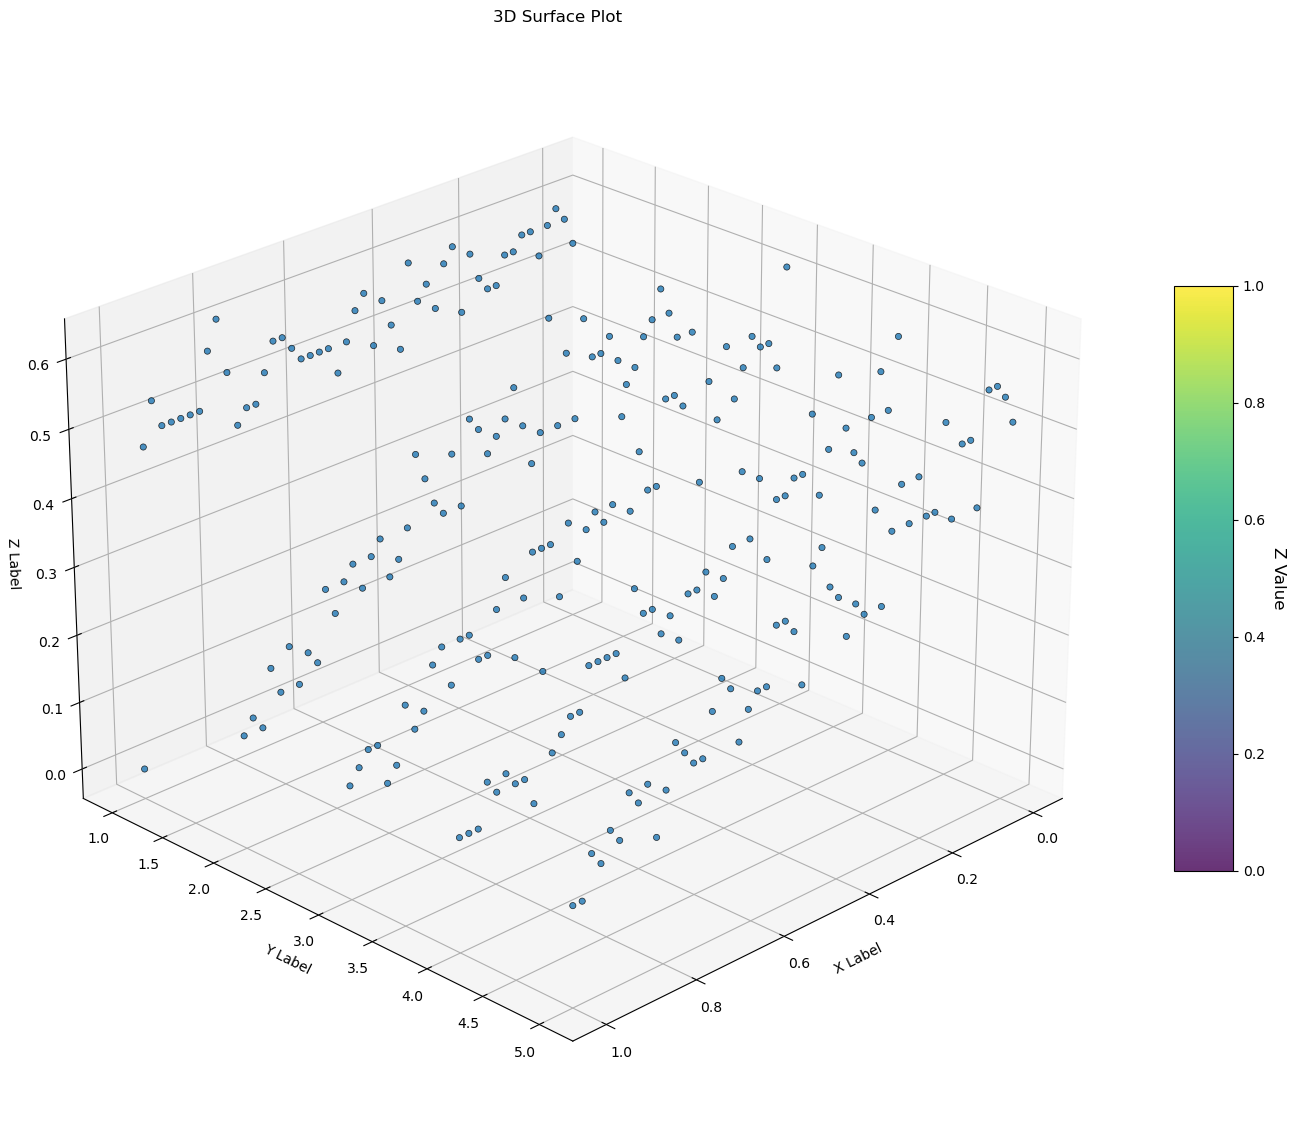

In [105]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

def plot3D(filepath):
    df = pd.read_csv(filepath)
    print(df.keys())

    x_values = df['p_slowdown'].values
    y_values = df['v_max'].values
    z_values = df['critical_density'].values

    # Plot
    fig = plt.figure(figsize=(14, 12))
    ax = fig.add_subplot(111, projection='3d')
    surf = ax.scatter(x_values, y_values, z_values, cmap='viridis', edgecolor='k', linewidth=0.5, alpha=0.8)

    # Customize the plot if needed
    ax.set_xlabel('X Label')
    ax.set_ylabel('Y Label')
    ax.set_zlabel('Z Label')
    ax.set_title('3D Surface Plot')

    cbar = fig.colorbar(surf, ax=ax, shrink=0.5, aspect=10)
    cbar.set_label('Z Value', rotation=270, labelpad=15, fontsize=12)

    # Customize the layout
    fig.tight_layout()

    ax.view_init(elev=25, azim=45)  # Adjust elevation and azimuthal angles

    plt.show()

filepath = 'critical_densities_nasch.csv'
plot3D(filepath)


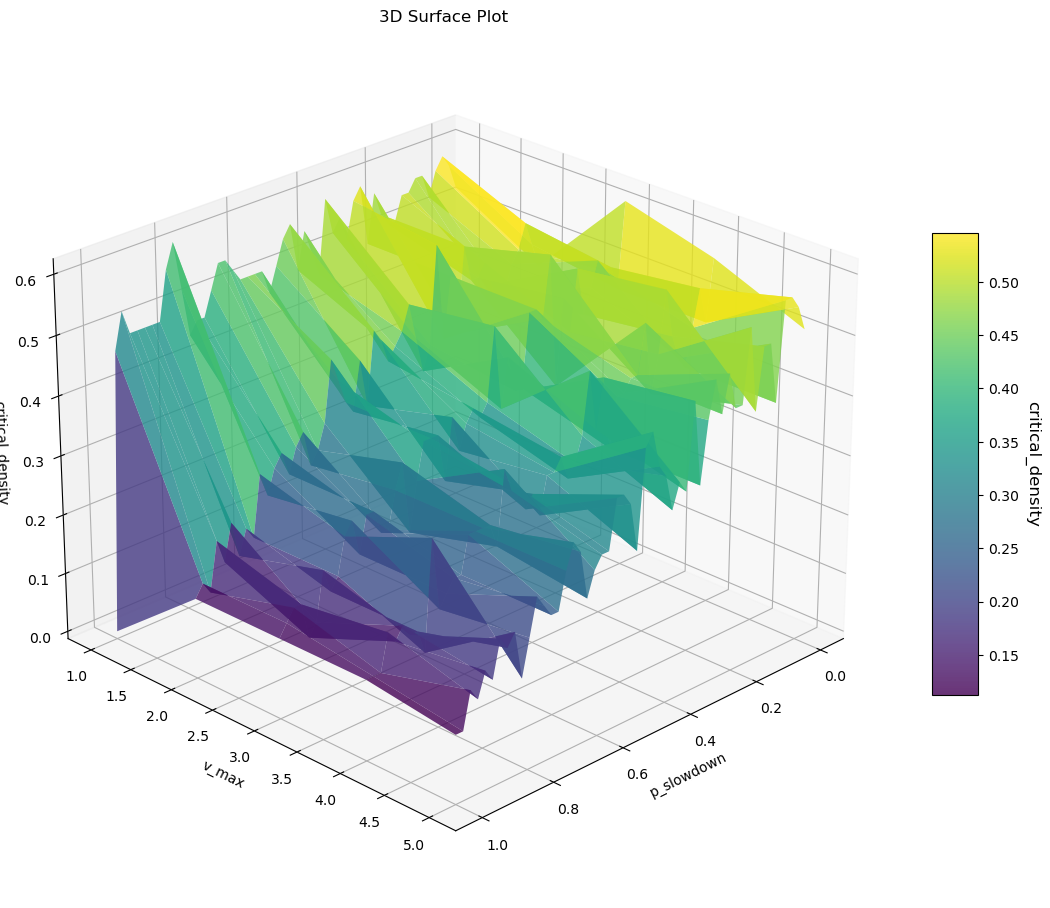

In [104]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

def plot3D(filepath):
    df = pd.read_csv(filepath)

    x_values = df['p_slowdown'].values
    y_values = df['v_max'].values
    z_values = df['critical_density'].values

    X, Y = np.meshgrid(np.unique(x_values), np.unique(y_values))
    Z = z_values.reshape(X.shape)

    fig = plt.figure(figsize=(14, 12))
    ax = fig.add_subplot(111, projection='3d')
    surf = ax.plot_surface(X, Y, Z, cmap='viridis', alpha=0.8)

    ax.set_xlabel('p_slowdown')
    ax.set_ylabel('v_max')
    ax.set_zlabel('critical_density')
    ax.set_title('3D Surface Plot')

    cbar = fig.colorbar(surf, ax=ax, shrink=0.5, aspect=10)
    cbar.set_label('critical_density', rotation=270, labelpad=15, fontsize=12)


    ax.view_init(elev=25, azim=45) 

    plt.show()

filepath = 'critical_densities_nasch.csv'
plot3D(filepath)
